In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('car-sales-extended.csv')
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [4]:
features = data[['Make','Colour','Odometer (KM)','Doors','Price']]
for col in features:
    print(col)
    print(features[col].value_counts())

Make
Toyota    398
Honda     304
Nissan    198
BMW       100
Name: Make, dtype: int64
Colour
White    407
Blue     321
Black     99
Red       94
Green     79
Name: Colour, dtype: int64
Odometer (KM)
73869     2
129188    2
35431     1
84787     1
213077    1
         ..
187663    1
65435     1
80664     1
119439    1
248360    1
Name: Odometer (KM), Length: 998, dtype: int64
Doors
4    856
5     79
3     65
Name: Doors, dtype: int64
Price
10429    2
12392    2
18919    2
4566     2
3974     2
        ..
17036    1
29635    1
4871     1
25649    1
12732    1
Name: Price, Length: 984, dtype: int64


In [5]:
features = data[['Make','Colour','Odometer (KM)','Doors','Price']]
for col in features:
    print(col)
    print(features[col].nunique())

Make
4
Colour
5
Odometer (KM)
998
Doors
3
Price
984


In [6]:
# Splitting Data Types into X and y

X  = data.drop('Price',axis=1)
y = data['Price']

In [7]:
print(X.shape)     # X - Independent Variables/Feature
print(y.shape)     # y - Target Feature

(1000, 4)
(1000,)


In [8]:
# Turn the Categories into Numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Categorical_feature = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   Categorical_feature)],
                                   remainder = 'passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [9]:
# Splitting the Dataset into X and y
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,train_size=0.70,test_size=0.30,random_state=42)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [10]:
model.score(X_test,y_test)

0.30701586107158696

In [11]:
y_pred = model.predict(X_test)
y_pred

array([11583.28, 11721.29, 44707.38, 23684.42, 23915.94, 12235.38,
       11743.31, 15730.99, 13397.68,  9855.36, 27222.4 , 19007.69,
       29015.86, 10497.2 , 17506.15, 19263.84, 10976.09, 17528.7 ,
       26660.07, 14347.  , 23915.94,  8128.22, 16845.39, 11582.01,
       24412.76, 27687.41, 11965.63, 17835.88, 27290.07, 21455.74,
       16162.46, 13556.76, 11131.14, 17329.88, 11936.74,  8807.99,
       11282.31, 32001.76, 12727.29,  9479.88, 17255.46, 23462.62,
       23411.99,  9422.25, 14851.75, 24441.95, 11926.12, 11227.44,
       23042.1 , 18660.97, 11762.84, 10045.02, 18357.06, 10855.42,
        9437.57, 24331.15,  6203.94,  8094.41,  8920.43, 19256.51,
       11898.74, 14536.39, 30057.25, 14137.78, 19835.67, 17102.47,
       11567.07, 25062.15, 15882.71, 11808.87, 11636.92, 16038.33,
       15639.28, 15722.98, 11579.16, 13270.08, 18608.48, 11715.89,
       12300.6 , 15726.74,  9648.64, 10945.59, 10566.24, 29596.89,
       25842.12, 18331.71,  8143.37, 11575.01, 30633.55, 26614

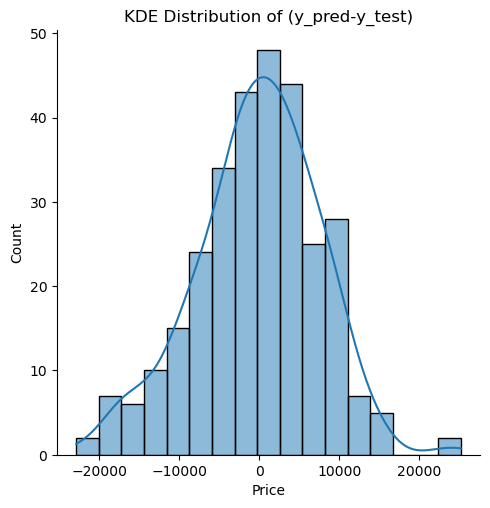

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(y_pred-y_test,kde=True);
plt.title('KDE Distribution of (y_pred-y_test)')
plt.show()